In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


In [85]:
def show_six(imgs, gray = True):
    fig, axes = plt.subplots(2, 3, figsize = (20, 8))
    fig.tight_layout()
    for i in range(len(imgs)):
        if gray:
            axes[i //3, i %3].imshow(imgs[i], "gray")
        else:
            axes[i //3, i %3].imshow(imgs[i])

        axes[i //3, i %3].set_xticks([])
        axes[i //3, i %3].set_yticks([])

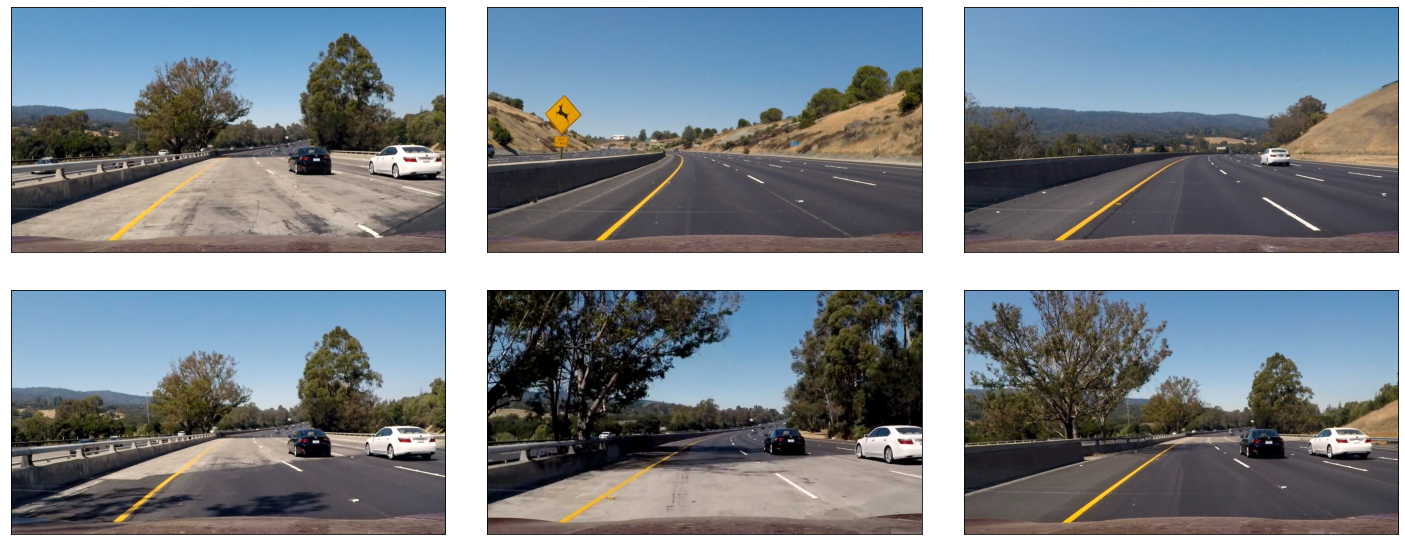

In [86]:
imgs = [plt.imread(f"Project_data/test_images/test{i}.jpg") for i in range(1, 7)]
show_six(imgs, 0)



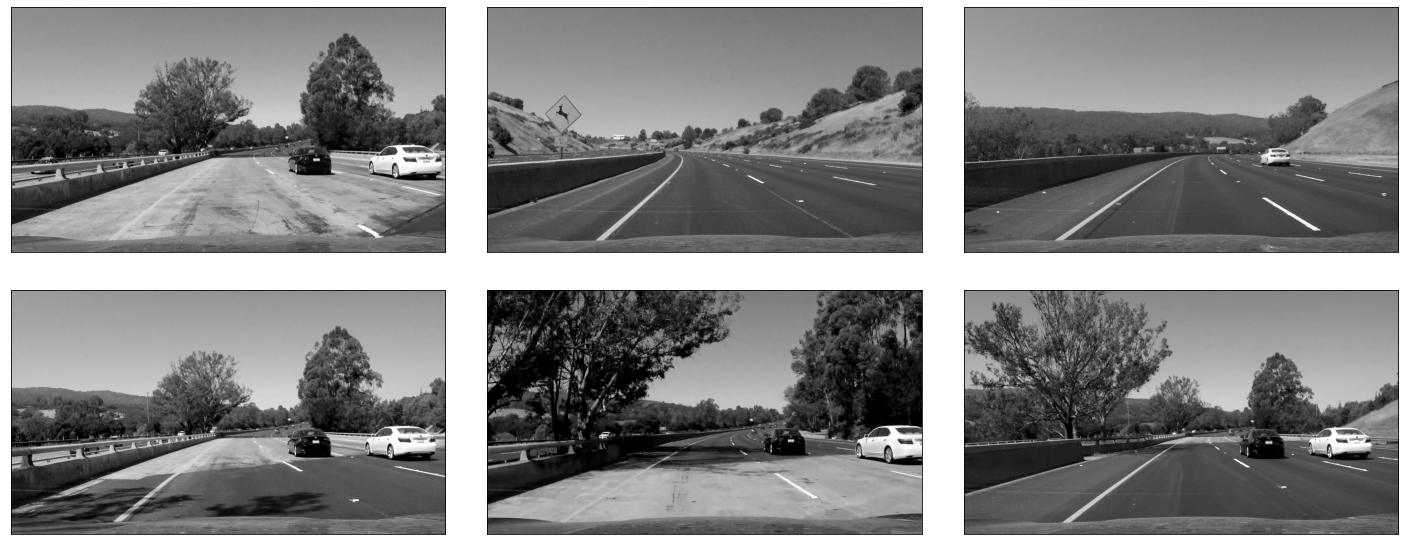

In [87]:
grays = [cv.cvtColor(img, cv.COLOR_RGB2GRAY) for img in imgs]
show_six(grays)

# Thresholding

In [88]:
def gaussian_blur(img, ksize):
    return cv.GaussianBlur(img, (ksize, ksize), 0)

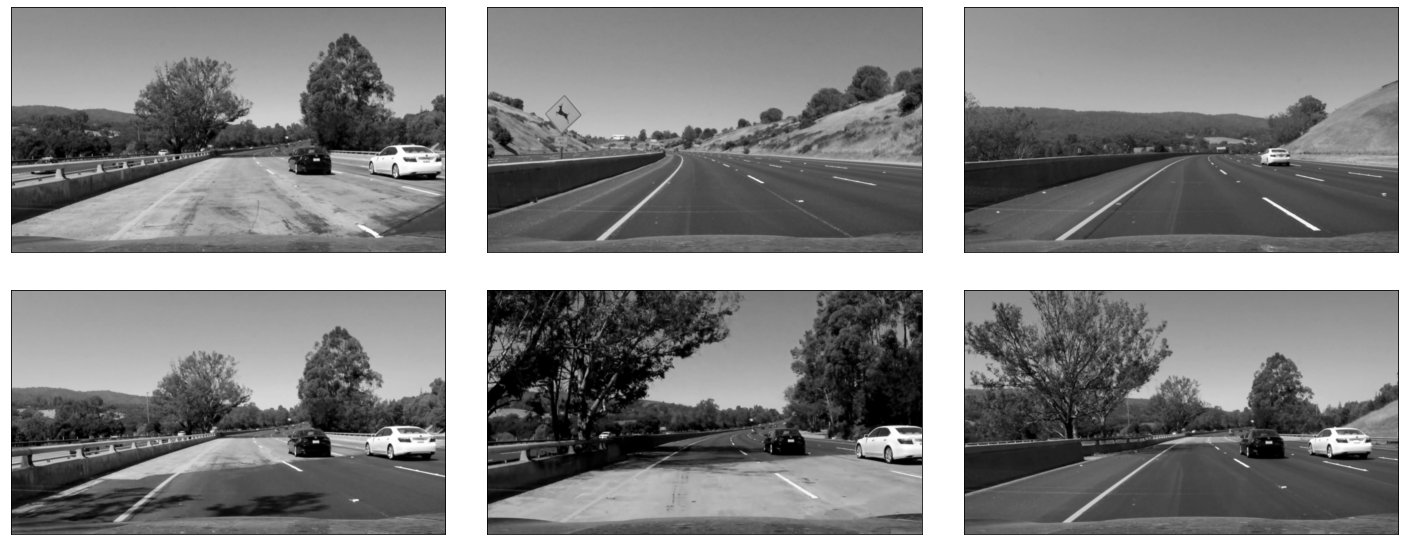

In [89]:
gaussians = [gaussian_blur(gray, 5) for gray in grays]
show_six(gaussians)

In [122]:
def S_thresholder(S, thresh=(0, 255)):

    S_threshold = S * 0
    S_threshold[(S >= thresh[0]) & (S <= thresh[1])] = 1
    
    return S_threshold

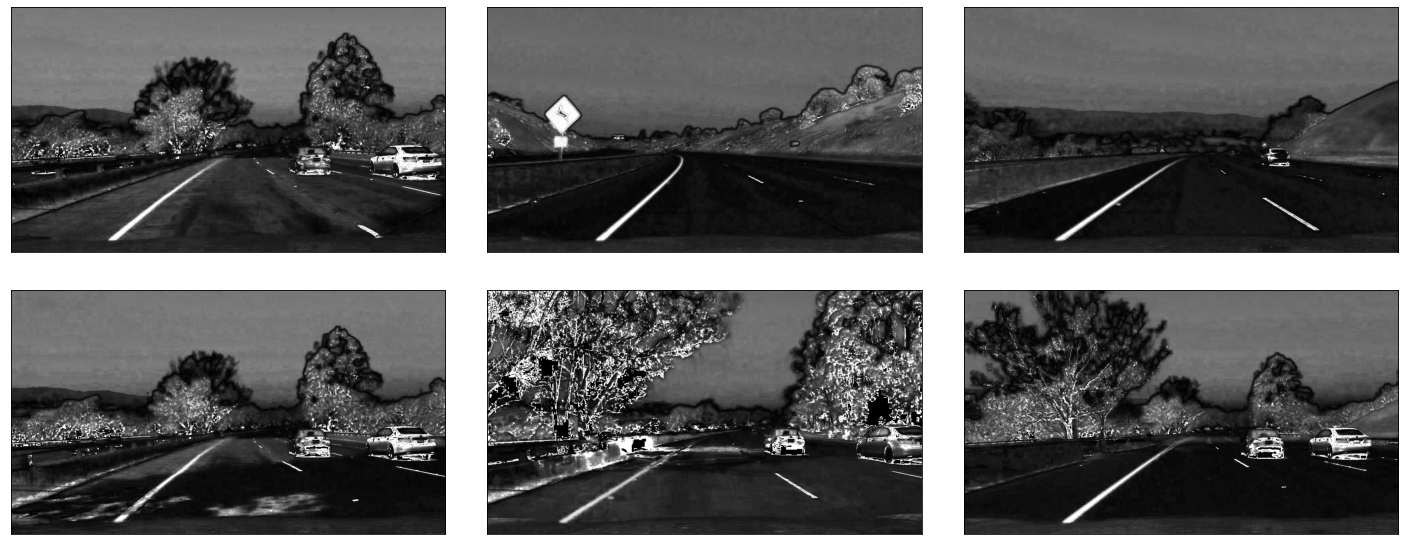

In [123]:
HLSs = [cv.cvtColor(img, cv.COLOR_RGB2HLS) for img in imgs]
Ss = [HLS[:,:,2] for HLS in HLSs]
show_six(Ss)

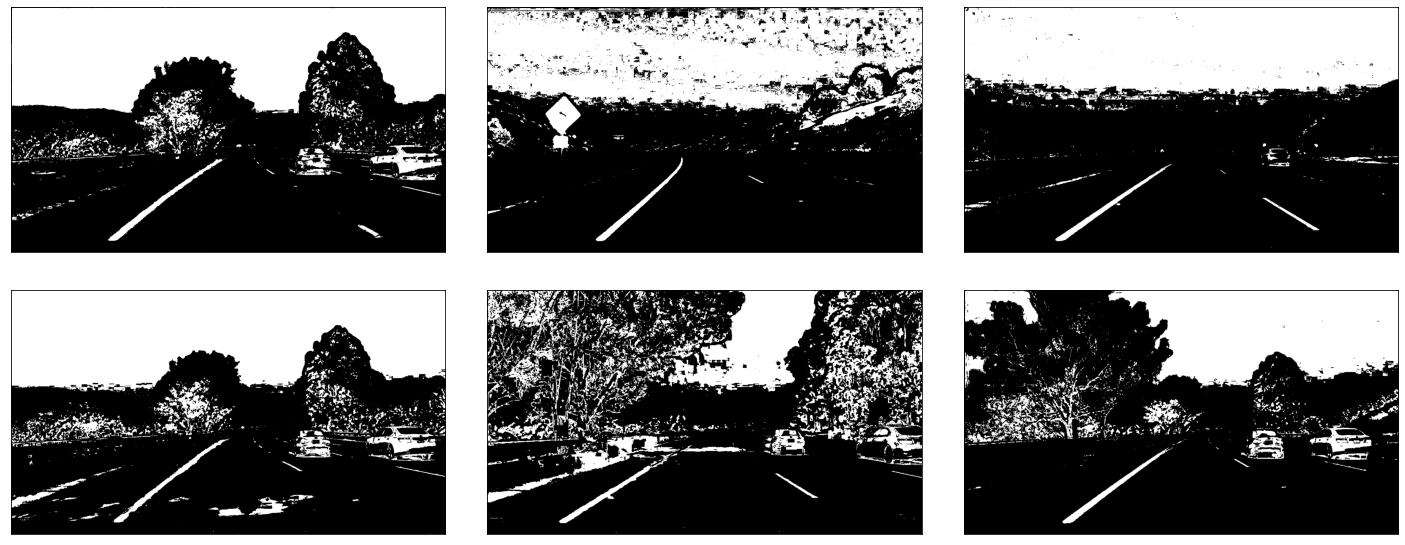

In [124]:
Sthresholds = [S_thresholder(S, (100, 255)) for S in Ss]
show_six(Sthresholds)

In [113]:
def abs_sobel_thresh(img, orient = 'x', sobel_kernel = 3, thresh = (0,255)):
    if orient == "x":
        sobel = cv.Sobel(img, cv.CV_64F, 1, 0, ksize = sobel_kernel)
    elif orient == "y":
        sobel = cv.Sobel(img, cv.CV_64F, 0, 1, ksize = sobel_kernel)


    abs_sobel = np.abs(sobel)

    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))


    sbinary = scaled_sobel * 0
    sbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel < thresh[1])] = 1

    return sbinary

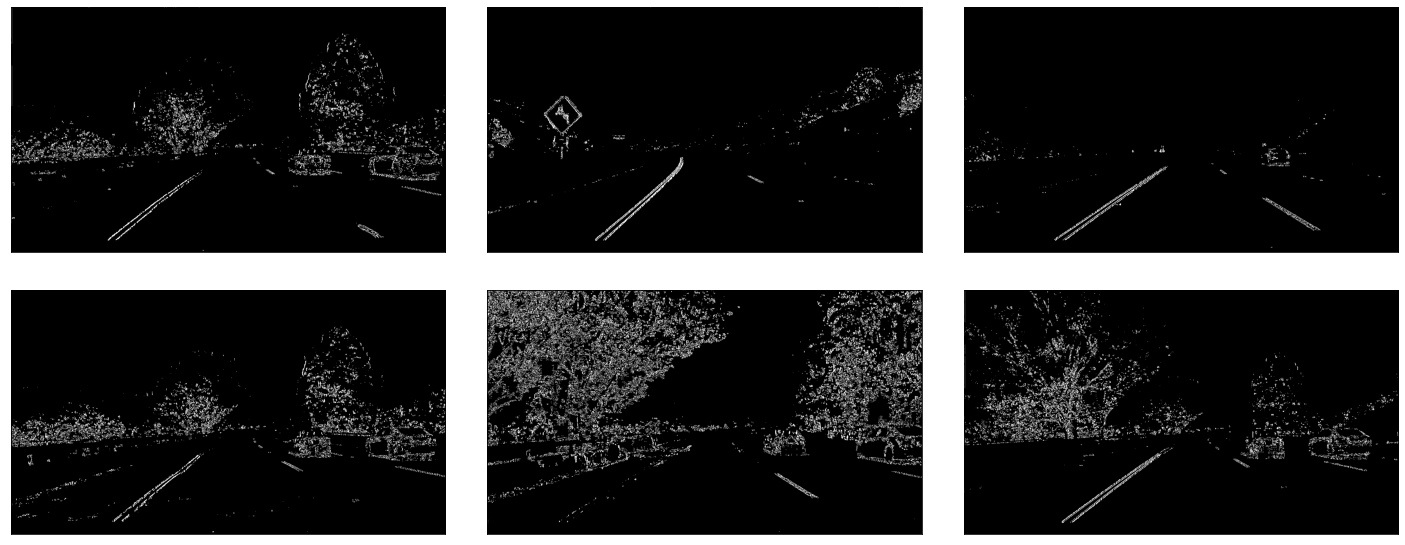

In [128]:
sobelxs = [abs_sobel_thresh(S, "x", 3, (35, 100)) for S in Ss]
show_six(sobelxs)

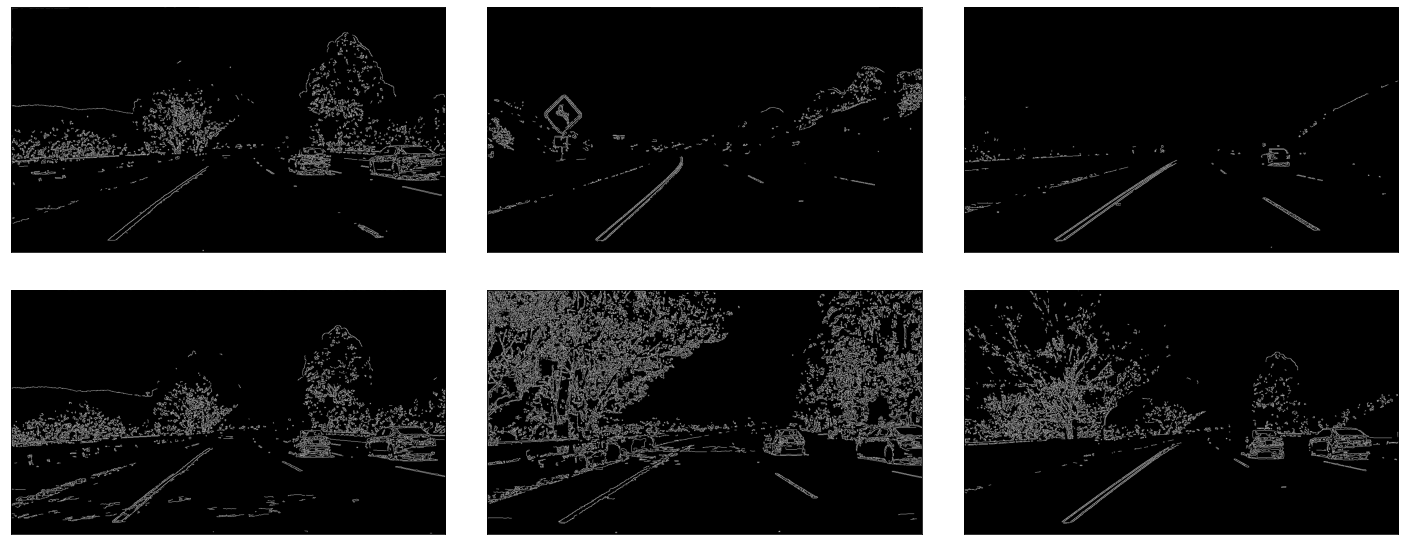

In [132]:
cannys = [cv.Canny(S, 150, 255) for S in Ss]
show_six(cannys)